In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import chardet
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [3]:
data=np.loadtxt('praktikum001_fort.22.lis',skiprows=9)
data1=np.loadtxt('praktikum001_fort.21.lis',skiprows=9)
#data1

In [4]:
data.reshape((1000,110,110))
data1.reshape((1000,1,1)).flatten()
print('ok')

ok


Text(0.5, 1.0, 'Dose profile close to the source (raw-data)')

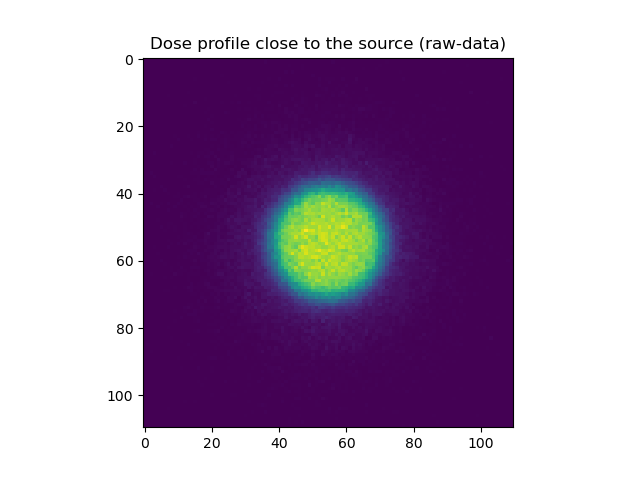

In [5]:
fig = plt.figure()
plt.imshow(data.reshape((110,110,1000))[:,:,200])
plt.title('Dose profile close to the source (raw-data)')

In [6]:
x=np.arange(0,1000)
xx=np.linspace(0,2-0.0025,800)
data1.flatten()[200:400]
print('ok')

ok


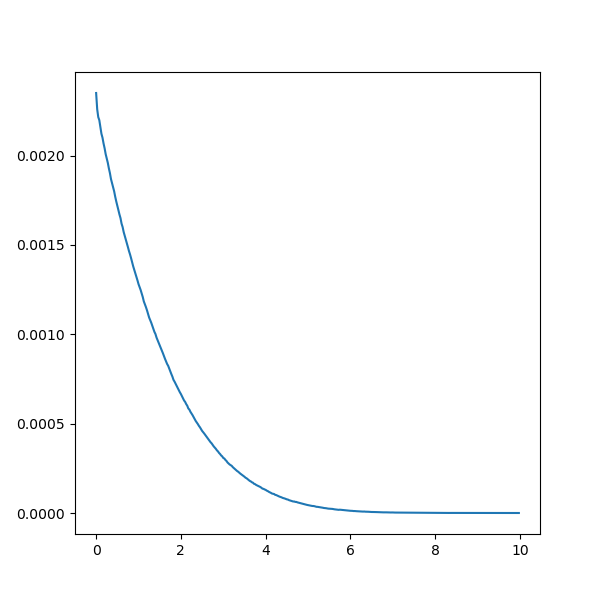

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(xx[:400]*10,data1.flatten()[200:600]*40000000*1.60218e-7)
#plt.plot(xx,1/(xx**2))
plt.show()

In [8]:
def pool_forward(A_prev, f=3,stride=1, mode = "average"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    ( n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros(( n_H, n_W, n_C))              
    a_prev_slice = A_prev
    for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
        vert_start = stride * h 
        vert_end = vert_start + f
        for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
            horiz_start = stride * w
            horiz_end = horiz_start + f
                
            for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                a_slice_prev = a_prev_slice[vert_start:vert_end,horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                if mode == "max":
                    A[ h, w, c] = np.max(a_slice_prev)
                elif mode == "average":
                    A[ h, w, c] = np.mean(a_slice_prev)
                elif mode=="sum":
                    A[h,w,c]=np.sum(a_slice_prev)    
    # YOUR CODE ENDS HERE
    
    # Store the input and hparameters in "cache" for pool_backward()
    
    # Making sure your output shape is correct
    assert(A.shape == (n_H, n_W, n_C))
    
    return A
    

In [9]:
data1.flatten()[200:].shape

(800,)

In [10]:
2/800

0.0025

In [11]:
np.pi*0.5**2*0.4

0.3141592653589793

In [12]:
l=pool_forward(data.reshape((110,110,1000))[:,:,200:], f=10, mode = "average")

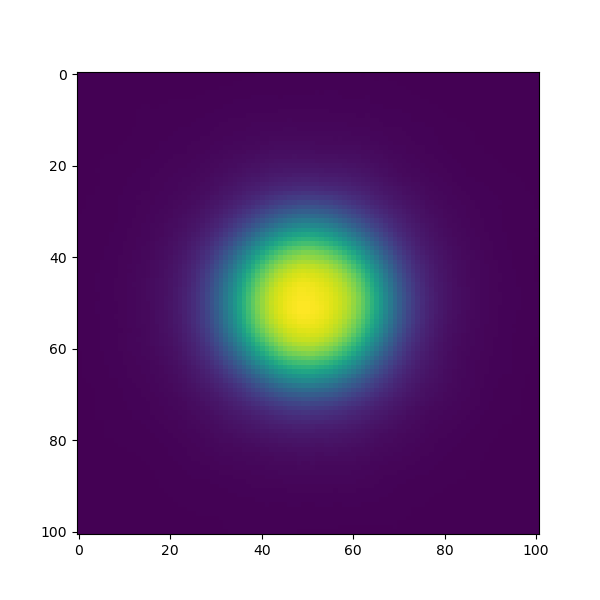

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(l[:,:,16])

In [14]:
print(l.shape)

(101, 101, 800)


In [15]:
np.sqrt(0.8)

0.8944271909999159

In [16]:
20/800

0.025

In [17]:
0.9/0.0909

9.900990099009903

In [18]:
10/110

0.09090909090909091

In [19]:
l.shape

(101, 101, 800)

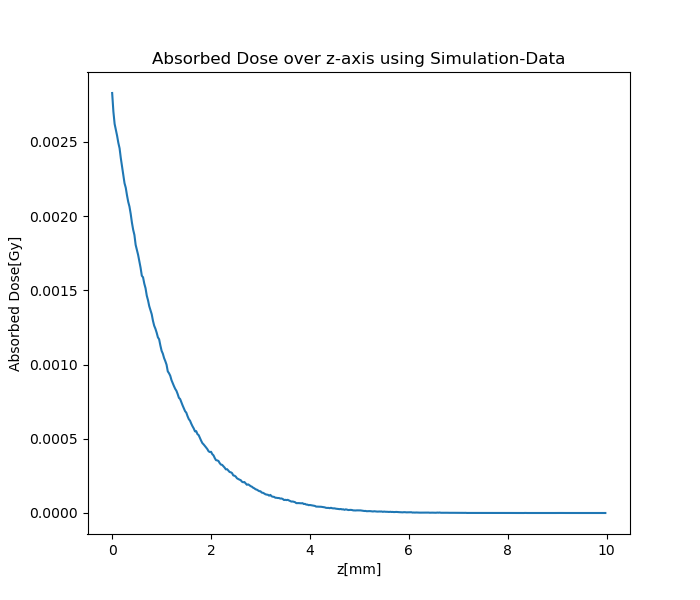

In [20]:
fig, ax = plt.subplots(figsize=(7,6))
plt.plot(xx[0:400]*10,l[50,50,0:400]*4000000*1.60218e-7)
plt.plot([])
plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Simulation-Data')
plt.show()

In [21]:
0.25/0.09

2.7777777777777777

In [22]:
gg=pool_forward(data.reshape((110,110,1000))[:,:,200:], f=9,stride=7, mode = "sum")

In [23]:
ggg=pool_forward(gg, f=14, mode = "max")
ggg.shape

(2, 2, 800)

In [24]:
gg.shape

(15, 15, 800)

In [25]:
xxx=xx[:400]*10

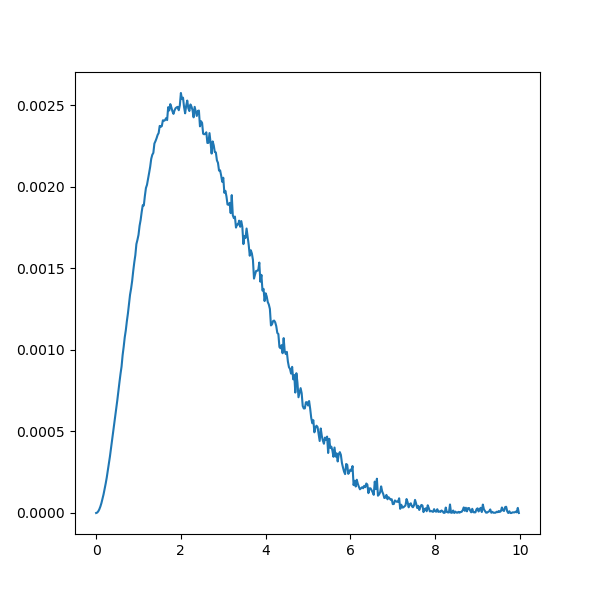

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(xx[:400]*10,l[50,50,:400]*(xxx**2))
plt.show()

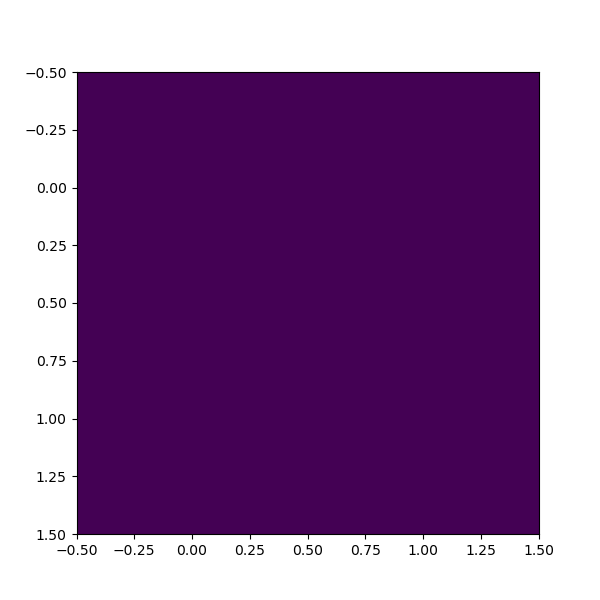

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(ggg[:,:,10])

In [28]:
h=pool_forward(data.reshape((110,110,1000))[:,:,200:], f=110, mode = "average")

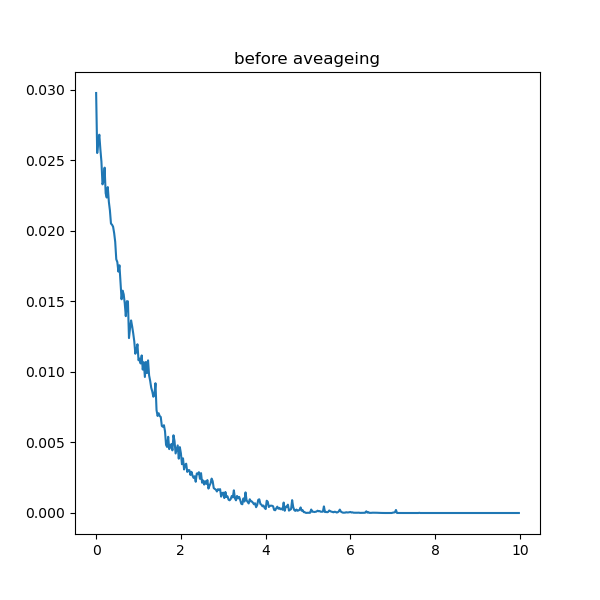

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(xx[:400]*10,data.reshape((110,110,1000))[54,54,200:600]*40000000*1.60218e-7)
plt.title('before aveageing')
plt.show()

In [30]:
data.reshape((110,110,1000))[55,55,200:400].shape

(200,)

In [31]:
h.shape

(1, 1, 800)

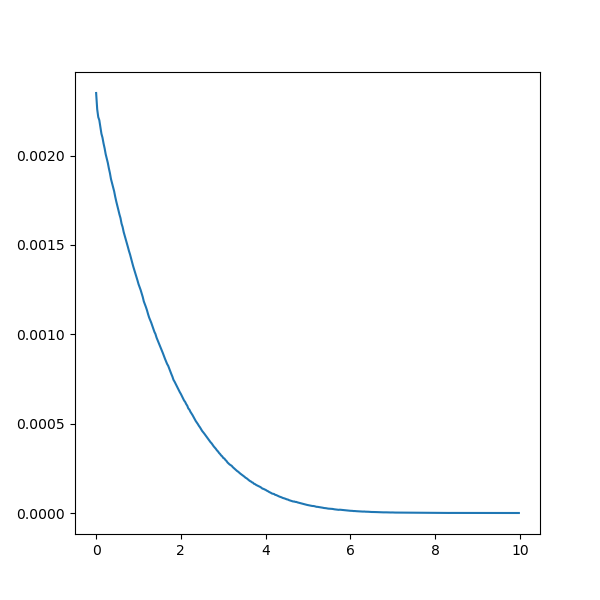

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(xx[:400]*10,h.flatten()[:400]*40000000*1.60218e-7)
plt.show()

In [33]:
data.reshape((110,110,1000))[:,:,201]

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6311e-06, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.3058e-06, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.4077e-06],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [34]:
x=np.linspace(-5,5,110)
y=np.linspace(-5,5,110)
np.meshgrid(x,y)

[array([[-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ],
        [-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ],
        [-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ],
        ...,
        [-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ],
        [-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ],
        [-5.        , -4.90825688, -4.81651376, ...,  4.81651376,
          4.90825688,  5.        ]]),
 array([[-5.        , -5.        , -5.        , ..., -5.        ,
         -5.        , -5.        ],
        [-4.90825688, -4.90825688, -4.90825688, ..., -4.90825688,
         -4.90825688, -4.90825688],
        [-4.81651376, -4.81651376, -4.81651376, ..., -4.81651376,
         -4.81651376, -4.81651376],
        ...,
        [ 4.81651376,  4.81651376,  4.81651376, ...,  

/scratch-local/slurm-job-tmp-6981924/ipykernel_348/1846596004.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


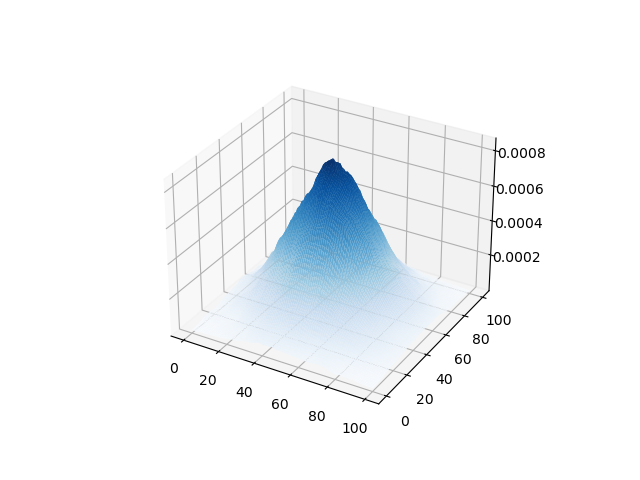

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate some sample data
import scipy.misc
#lena = data.reshape((110,110,1000))[:,:,328]
lena=l[:,:,128+16]*40000000*1.60218e-7
# downscaling has a "smoothing" effect
#lena = scipy.misc.imresize(lena, 0.15, interp='cubic')

# create the x and y coordinate arrays (here we just use pixel indices)
xxx, yyy = np.mgrid[:lena.shape[0], 0:lena.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xxx, yyy, lena ,rstride=1, cstride=1, cmap=cm.Blues)

# show it
plt.show()

In [36]:
pixel=10/110
2.5/pixel
83-27

56

In [37]:
l.shape

(101, 101, 800)

/scratch-local/slurm-job-tmp-6981924/ipykernel_348/1215786363.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


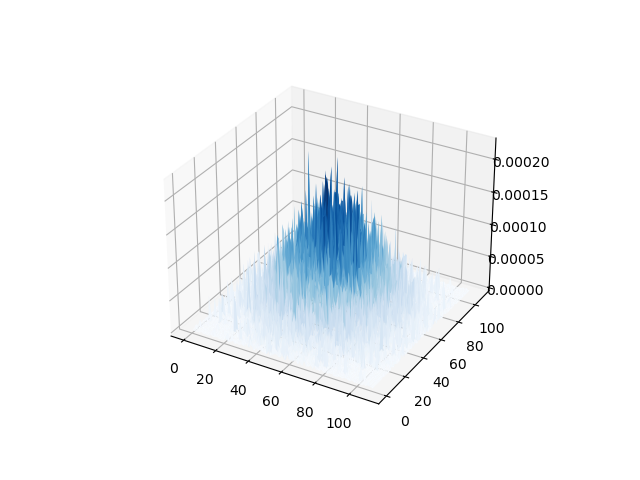

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate some sample data
import scipy.misc
lena = data.reshape((110,110,1000))[:,:,328+16]
#lena=l[:,:,16]*40000000*1.60218e-7
# downscaling has a "smoothing" effect
#lena = scipy.misc.imresize(lena, 0.15, interp='cubic')

# create the x and y coordinate arrays (here we just use pixel indices)
xxx, yyy = np.mgrid[:lena.shape[0], 0:lena.shape[1]]
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xxx, yyy, lena ,rstride=1, cstride=1, cmap=cm.Blues)

# show it
plt.show()

In [39]:
ll=pool_forward(data.reshape((110,110,1000))[27:83,27:83,200:], f=10, mode = "average")

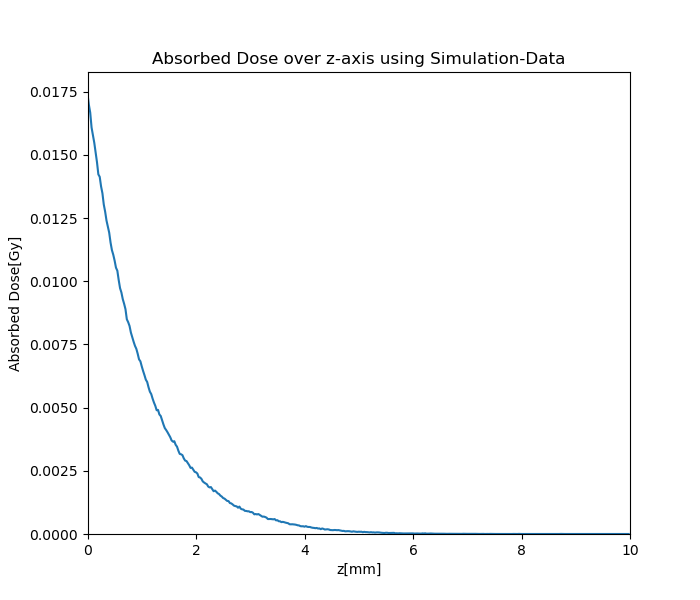

In [40]:
fig, ax = plt.subplots(figsize=(7,6))
plt.plot(xx[0:400]*10,ll[23,23,16:416]*35600000*1.60218e-7)
plt.plot([])
plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Simulation-Data')
plt.xlim(0,10)
plt.ylim(0,None)
plt.show()

/scratch-local/slurm-job-tmp-6981924/ipykernel_348/2249397128.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


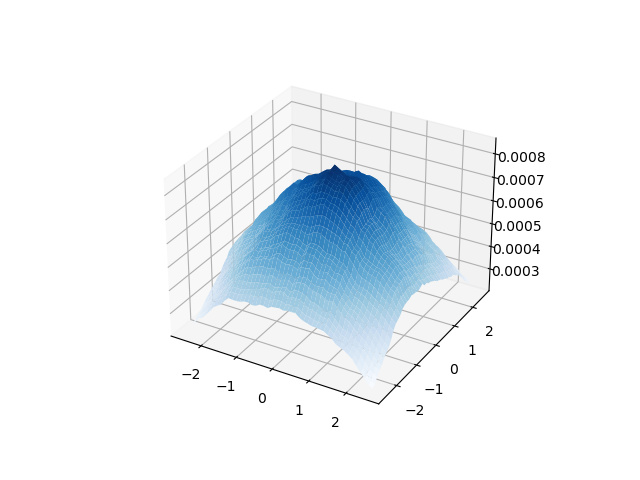

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate some sample data
import scipy.misc
#lena = data.reshape((110,110,1000))[:,:,328]
lena=ll[:,:,128+16]*40000000*1.60218e-7
# downscaling has a "smoothing" effect
#lena = scipy.misc.imresize(lena, 0.15, interp='cubic')

# create the x and y coordinate arrays (here we just use pixel indices)
x=np.linspace(-2.5,2.5,47)
y=np.linspace(-2.5,2.55,47)
xxx,yyy=np.meshgrid(x,y)
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xxx, yyy, lena ,rstride=1, cstride=1, cmap=cm.Blues)

# show it
plt.show()

In [42]:
np.linspace(-2.5,2.5,47)

array([-2.5       , -2.39130435, -2.2826087 , -2.17391304, -2.06521739,
       -1.95652174, -1.84782609, -1.73913043, -1.63043478, -1.52173913,
       -1.41304348, -1.30434783, -1.19565217, -1.08695652, -0.97826087,
       -0.86956522, -0.76086957, -0.65217391, -0.54347826, -0.43478261,
       -0.32608696, -0.2173913 , -0.10869565,  0.        ,  0.10869565,
        0.2173913 ,  0.32608696,  0.43478261,  0.54347826,  0.65217391,
        0.76086957,  0.86956522,  0.97826087,  1.08695652,  1.19565217,
        1.30434783,  1.41304348,  1.52173913,  1.63043478,  1.73913043,
        1.84782609,  1.95652174,  2.06521739,  2.17391304,  2.2826087 ,
        2.39130435,  2.5       ])

In [43]:
16*20/800

0.4

In [44]:
33.3*np.exp(-(np.log(2)*681527292)/(28.79*365*24*3600))

19.79143902111003

In [45]:
np.sqrt((19.79*3.3/33.3)**2+(19.79*np.log(2)*681527292*6*365*24*3600/((28.79*365*24*3600)**2))**2)

2.907097116944712

In [46]:
33.3e6*28.79*365*24*3600/np.log(2)

4.361813017485873e+16

In [47]:
np.sqrt((28.79*365*24*3600*3.3e6/np.log(2))**2+(6*365*24*3600*33.3e6/np.log(2))**2)

1.0065639926585686e+16

In [48]:
4.361813017485873e+16*np.exp(-np.log(2)*681527292/(28.79*365*24*3600))

2.592389079791459e+16

In [49]:
np.sqrt((4.4e+16*1.1e+16/2.592389079791459e+16)**2+(2.592389079791459e+16*np.log(2)*681527292*6*365*24*3600/((28.79*365*24*3600)**2))**2)

1.888047517415492e+16

In [50]:
2.6/4.4*100

59.09090909090908

In [51]:
4.4e16*((1/(28.79*365*24*3600))/(1/(64*3600)-1/(28.79*365*24*3600)))*(np.exp(-np.log(2)*681527292/(28.79*365*24*3600))-np.exp(-np.log(2)*681527292/(64*3600)))

6637892914019.164

In [52]:
6637892914019.164/4.4e16*100

0.015086120259134462

In [53]:
(4.4e16-2.6e16-6637892914019.164)/4.4e16*100

40.89400478883177

In [54]:
2023-2015

8

In [55]:
31-13+30+21

69

In [56]:
(8*365+71)*24*3600

258422400

In [57]:
1.171*np.exp(-np.log(2)*258422400/(28.79*365*24*3600))

0.9613344117305268

In [58]:
4.4e+16*np.exp(-np.log(2)*((21*365+7*30.44+10)*24+3)*3600/(28.79*365*24*3600))*(1-np.exp(-np.log(2)*2/(28.79*365*24*3600)))

39929005.99387751

In [59]:
9237390190206314.0/4.4e16

0.2099406861410526

In [60]:
0.4/(25/1000)

16.0

<AxesSubplot:title={'center':'Heatmap of the Dose profile close to the source (after Pooling)'}>

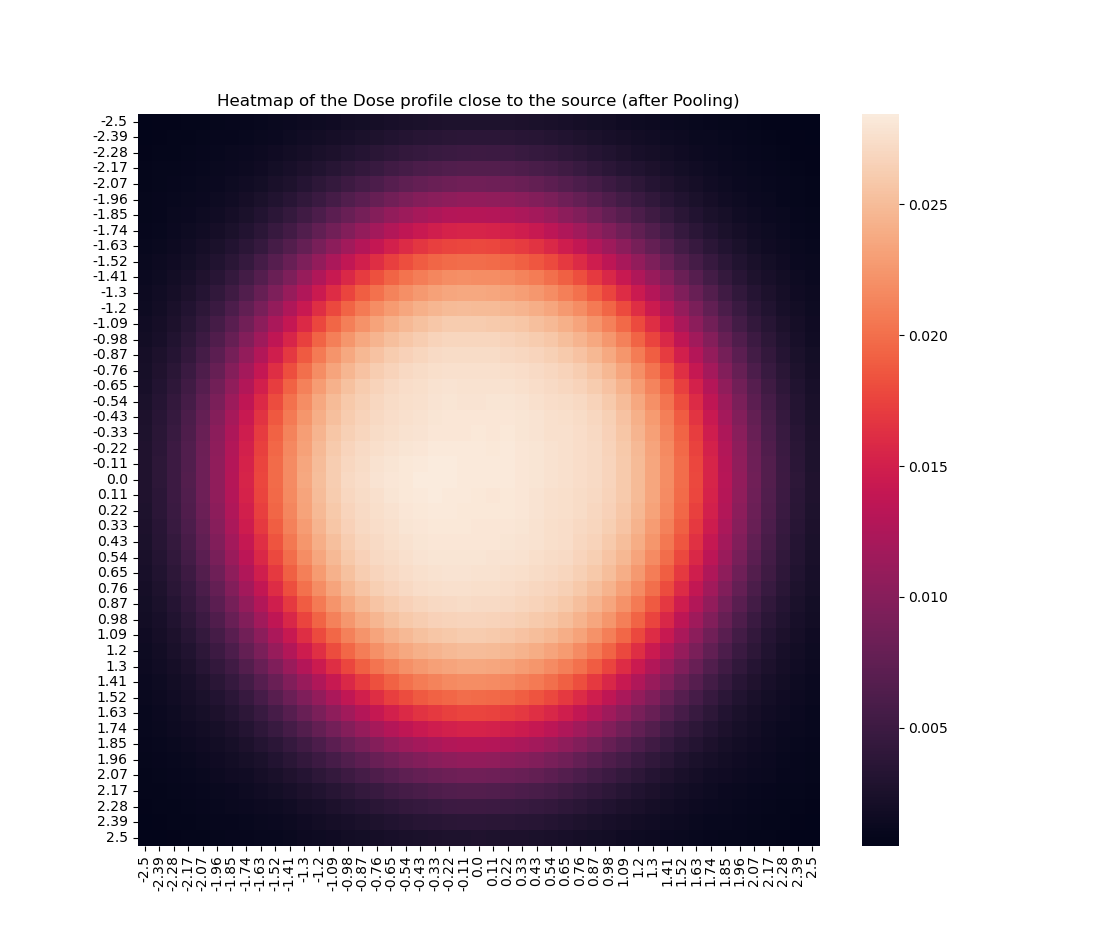

In [61]:
fig, ax = plt.subplots(figsize=(11,9.5))


plt.title('Heatmap of the Dose profile close to the source (after Pooling)')
df_cm = pd.DataFrame(ll[:,:,0]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
df_cm.index=df_cm.index.map(lambda x: round(x, 2))
sns.heatmap(df_cm)


<AxesSubplot:title={'center':'Heatmap of the Dose profile 0.4mm away from the Source (after Pooling)'}>

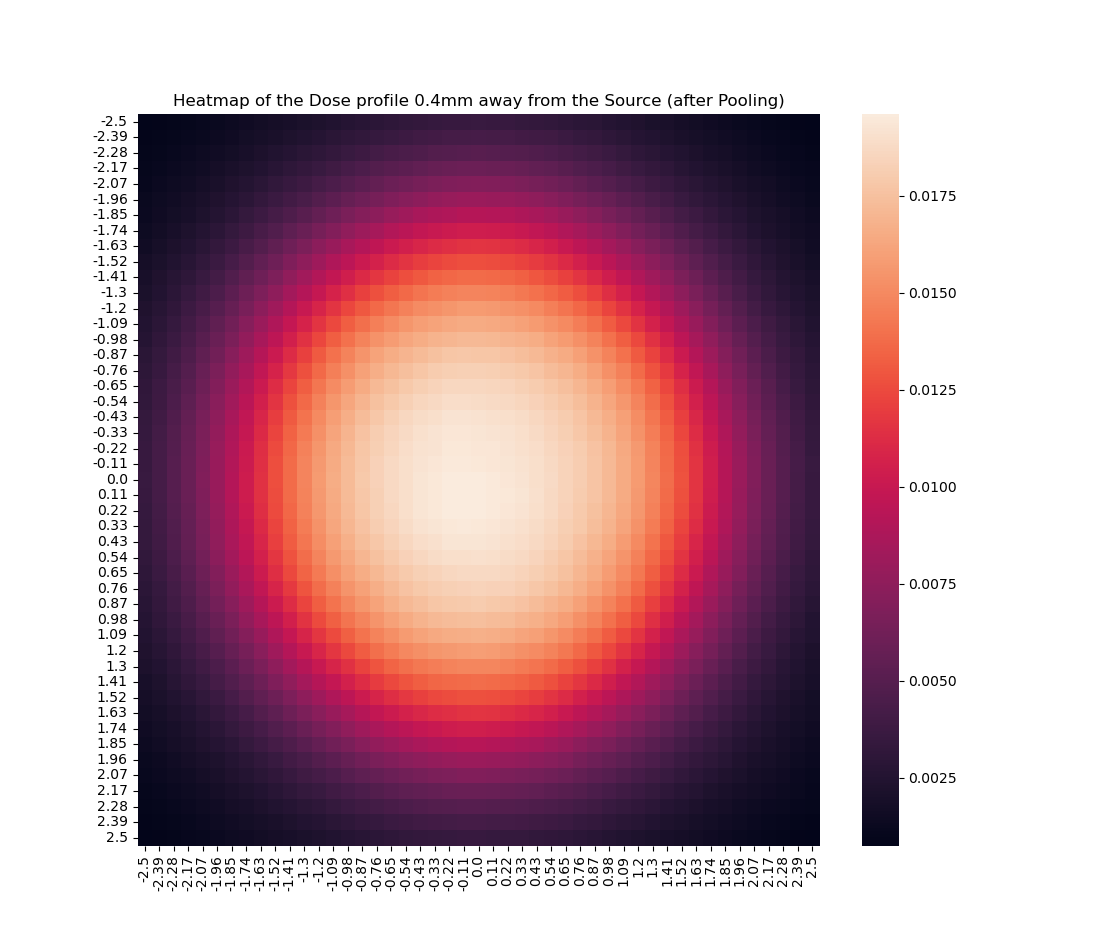

In [62]:
fig, ax = plt.subplots(figsize=(11,9.5))


plt.title('Heatmap of the Dose profile 0.4mm away from the Source (after Pooling)')
df_cm = pd.DataFrame(ll[:,:,16]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
df_cm.index=df_cm.index.map(lambda x: round(x, 2))
sns.heatmap(df_cm)


<AxesSubplot:title={'center':'Heatmap of the Dose profile (3.2+0.4)mm away from the Source (after Pooling)'}>

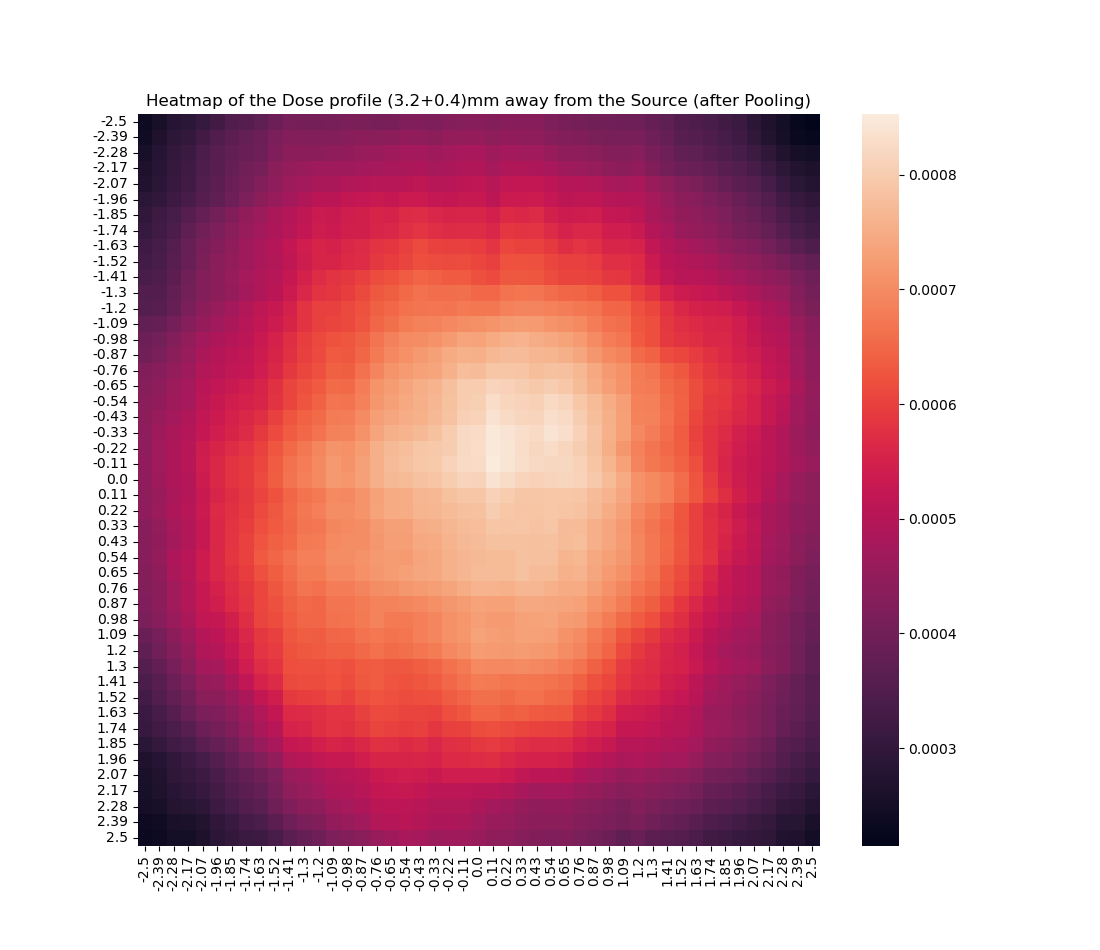

In [63]:
fig, ax = plt.subplots(figsize=(11,9.5))


plt.title('Heatmap of the Dose profile (3.2+0.4)mm away from the Source (after Pooling)')
df_cm = pd.DataFrame(ll[:,:,16+128]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
df_cm.index=df_cm.index.map(lambda x: round(x, 2))
sns.heatmap(df_cm)


In [64]:
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))

In [65]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return (idx,array[idx])

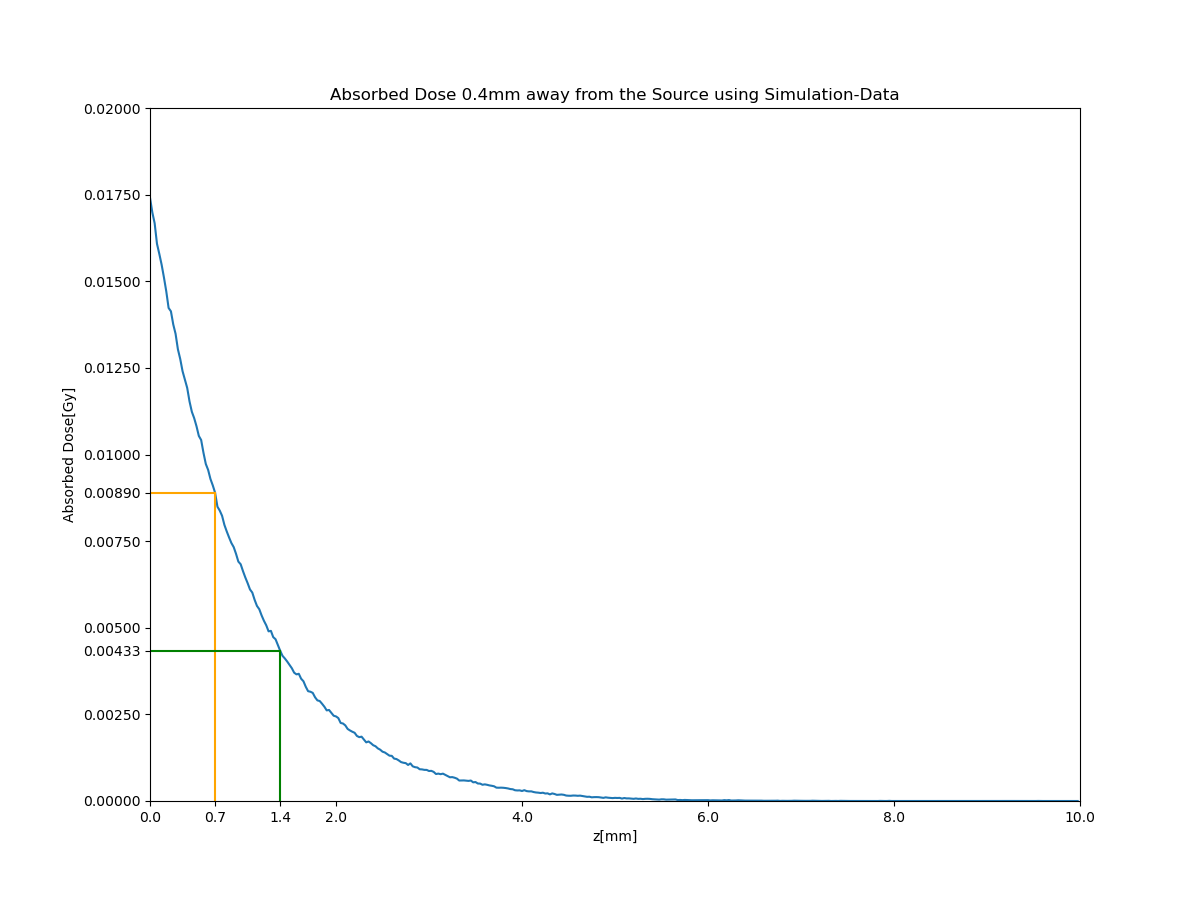

In [66]:
fig, ax = plt.subplots(figsize=(12,9))
ph=(xx[(find_nearest(ll[23,23,16:416],np.max(ll[23,23,16:416])/2)[0])]*10,find_nearest(ll[23,23,16:416],np.max(ll[23,23,16:416])/2)[1]*35600000*1.60218e-7)
pq=(xx[(find_nearest(ll[23,23,16:416],np.max(ll[23,23,16:416])/4)[0])]*10,find_nearest(ll[23,23,16:416],np.max(ll[23,23,16:416])/4)[1]*35600000*1.60218e-7)

plt.plot(xx[0:400]*10,ll[23,23,16:416]*35600000*1.60218e-7)

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')
plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose 0.4mm away from the Source using Simulation-Data')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,pq[0])
ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,pq[1])
ax.set_yticks(xt)
plt.show()

In [67]:
find_nearest(ll[23,23,16:416],np.max(ll[23,23,16:416])/4)

(56, 0.0007600001)

In [68]:
ll[23,23,16:416].shape

(400,)

In [69]:
#df_cm.loc[1]

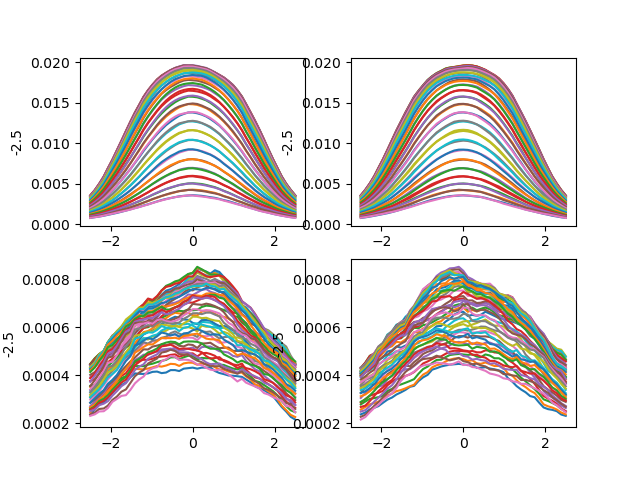

In [70]:
fig, ax_array = plt.subplots(2, 2,squeeze=False)#

df_cm = pd.DataFrame(ll[:,:,16]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
df_cm.index=df_cm.index.map(lambda x: round(x, 2))


for row in df_cm.index:
    sns.lineplot(data=df_cm.loc[row], ax=ax_array[0,0])
for col in df_cm.columns:
    sns.lineplot(data=df_cm.loc[:,col], ax=ax_array[0,1])


df_cm = pd.DataFrame(ll[:,:,16+128]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))

df_cm.index=df_cm.index.map(lambda x: round(x, 2))    
for row in df_cm.index:
    sns.lineplot(data=df_cm.loc[row], ax=ax_array[1,0])
for col in df_cm.columns:
    sns.lineplot(data=df_cm.loc[:,col], ax=ax_array[1,1])
plt.show()